In [1]:
%run ../supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



We walk through a variational AutoEncoder on the MNIST dataset

First the imports

In [2]:

import torch
from torch.utils.data import DataLoader
from svlearn.auto_encoders.variational_auto_encoder_mnist import VariationalAutoencoderMnist
import torchvision.datasets as datasets
from svlearn.auto_encoders.auto_encoder_util import visualize_interpolations

Load the path for mnist data and results

In [3]:
mnist_data_path = '/home/chandar/data'
model_path = '/home/chandar/results'

In [4]:
mnist_trainset = datasets.MNIST(root=mnist_data_path, train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(eval_dataset, batch_size=128, shuffle=False)

Identify device (either cuda or cpu)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VariationalAutoencoderMnist().to(device)

In [7]:
checkpoint = torch.load(f"{model_path}/mnist/mnist_variational_autoencoder.pt")
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

VariationalAutoencoderMnist(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=1568, out_features=128, bias=True)
    (6): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=1568, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(32, 7, 7))
    (3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  )
  (mu_layer): Linear(in_features=128, out_features=128, bias=True)
  (logvar_layer): Linear(in_features=128, out_features=128, bias=True)
)

Visualize the reconstruction (top row being original images and bottom being reconstructed)

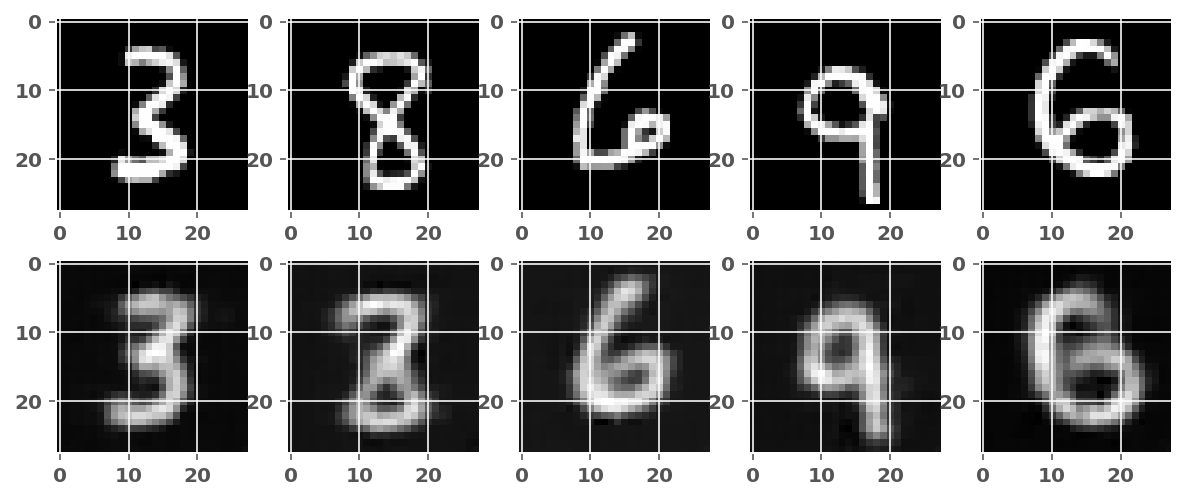

In [8]:
import matplotlib.pyplot as plt
model.eval()
with torch.no_grad():
    images = next(iter(val_loader))
    images = [img.to(device) for img in images]
    images = torch.stack(images)
    reconstructed, _, _, _ = model(images)
    
    # Display original and reconstructed images
    _, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(5):
        axs[0, i].imshow(images[i].cpu().squeeze(0), cmap='gray')
        axs[1, i].imshow(reconstructed[i].cpu().squeeze(0), cmap='gray')
    plt.show()

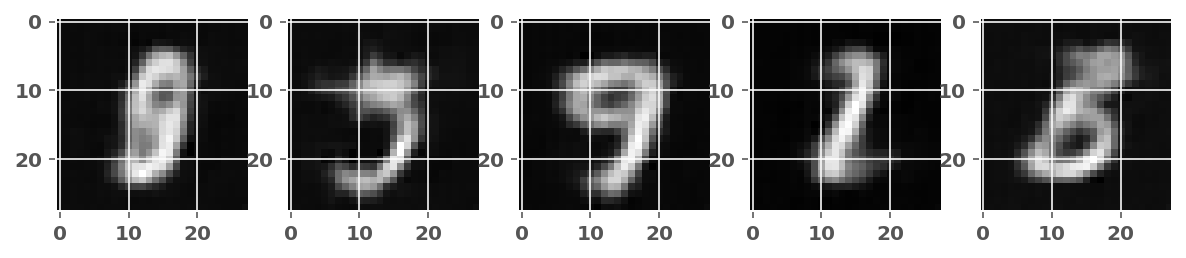

In [9]:
latent_dim = 128

# Batch size (samples to generate)
batch_size = 5

# Generate a batch of 128-dimensional latent Gaussian normal variables
latent_variables = torch.randn(batch_size, latent_dim)
with torch.no_grad():
    generated_images = model.decoder(latent_variables.to(device))
    # Display original and reconstructed images
    _, axs = plt.subplots(1, 5, figsize=(10, 4))
    for i in range(5):
        axs[i].imshow(generated_images[i].cpu().squeeze(0), cmap='gray')
    plt.show()

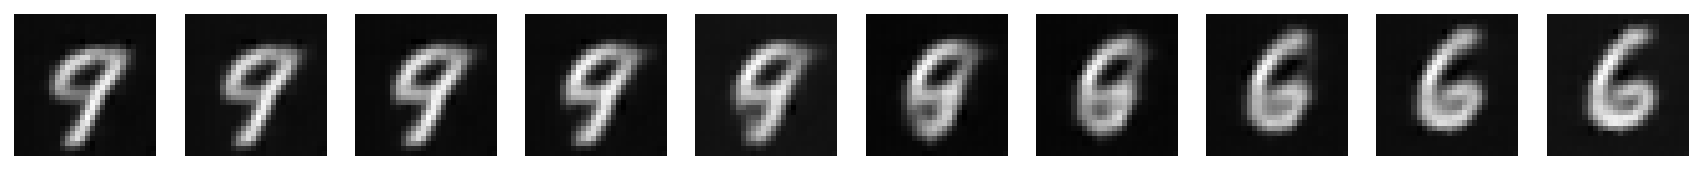

In [10]:
# Create random shuffle of train dataset to pick random 2 images every time.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
first_train_batch = next(iter(train_loader))
# Visualize interpolations
# Assuming image1 and image2 are samples from your dataset (PIL images already transformed to tensor)
image1 = first_train_batch[0]  # First image
image2 = first_train_batch[1]  # Second image

# Visualize interpolation between the two images
visualize_interpolations(model, image1, image2, num_steps=10, device=device)